In [2]:
!pip install opendatasets

In [3]:
import os # To download the dataset
import pandas as pd # For data manipulation
import numpy as np # For numeric calculations with data
import matplotlib.pyplot as plt # For generating plots
import seaborn as sns # For making complex plots

In [4]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vaibhavbura
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset


In [5]:
def get_class_paths(path):
    classes = []
    class_paths = []

    # Iterate through directories in the training path
    for label in os.listdir(path):
        label_path = os.path.join(path, label)

        # Check if it's a directory
        if os.path.isdir(label_path):
            # Iterate through images in the label directory
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path, image)

                # Add class and path to respective lists
                classes.append(label)
                class_paths.append(image_path)

    # Create a dataframe with the collected data
    df = pd.DataFrame({
         'Class Path': class_paths,
         'Class': classes
    })

    return df

In [6]:
tr_df = get_class_paths("/content/brain-tumor-mri-dataset/Training")


In [7]:
tr_df

,Class Path,Class
0,/content/brain-tumor-mri-dataset/Training/meni...,meningioma
1,/content/brain-tumor-mri-dataset/Training/meni...,meningioma
2,/content/brain-tumor-mri-dataset/Training/meni...,meningioma
3,/content/brain-tumor-mri-dataset/Training/meni...,meningioma
4,/content/brain-tumor-mri-dataset/Training/meni...,meningioma
...,...,...
5707,/content/brain-tumor-mri-dataset/Training/pitu...,pituitary
5708,/content/brain-tumor-mri-dataset/Training/pitu...,pituitary
5709,/content/brain-tumor-mri-dataset/Training/pitu...,pituitary
5710,/content/brain-tumor-mri-dataset/Training/pitu...,pituitary


In [8]:
ts_df = get_class_paths("/content/brain-tumor-mri-dataset/Testing")

In [9]:
ts_df

,Class Path,Class
0,/content/brain-tumor-mri-dataset/Testing/menin...,meningioma
1,/content/brain-tumor-mri-dataset/Testing/menin...,meningioma
2,/content/brain-tumor-mri-dataset/Testing/menin...,meningioma
3,/content/brain-tumor-mri-dataset/Testing/menin...,meningioma
4,/content/brain-tumor-mri-dataset/Testing/menin...,meningioma
...,...,...
1306,/content/brain-tumor-mri-dataset/Testing/pitui...,pituitary
1307,/content/brain-tumor-mri-dataset/Testing/pitui...,pituitary
1308,/content/brain-tumor-mri-dataset/Testing/pitui...,pituitary
1309,/content/brain-tumor-mri-dataset/Testing/pitui...,pituitary


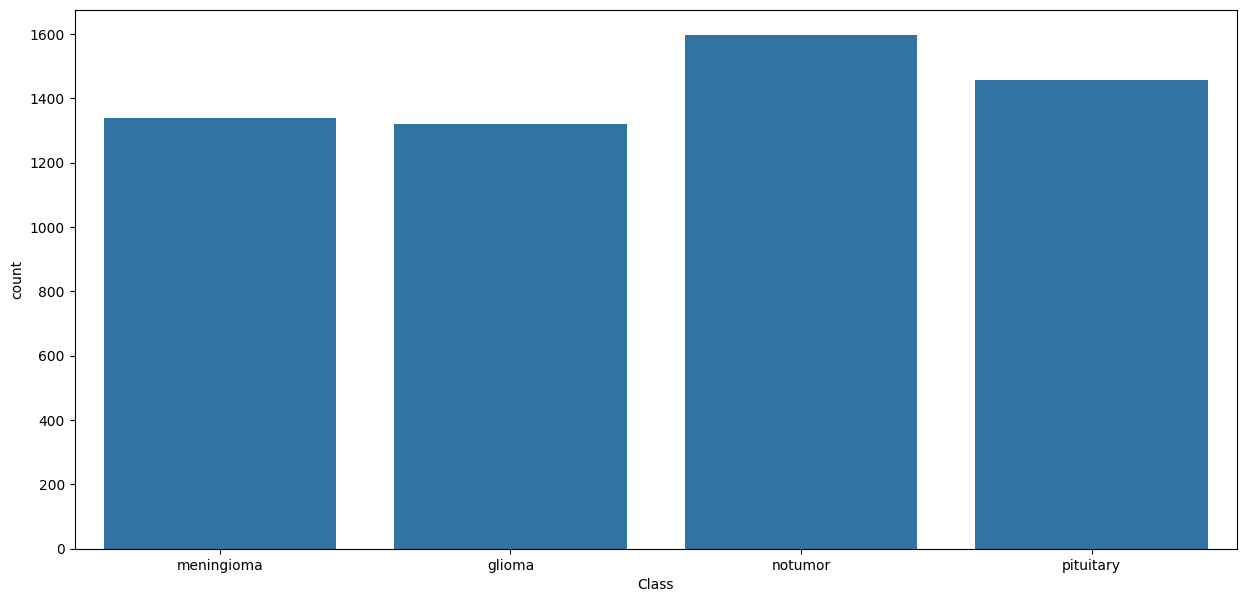

In [10]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

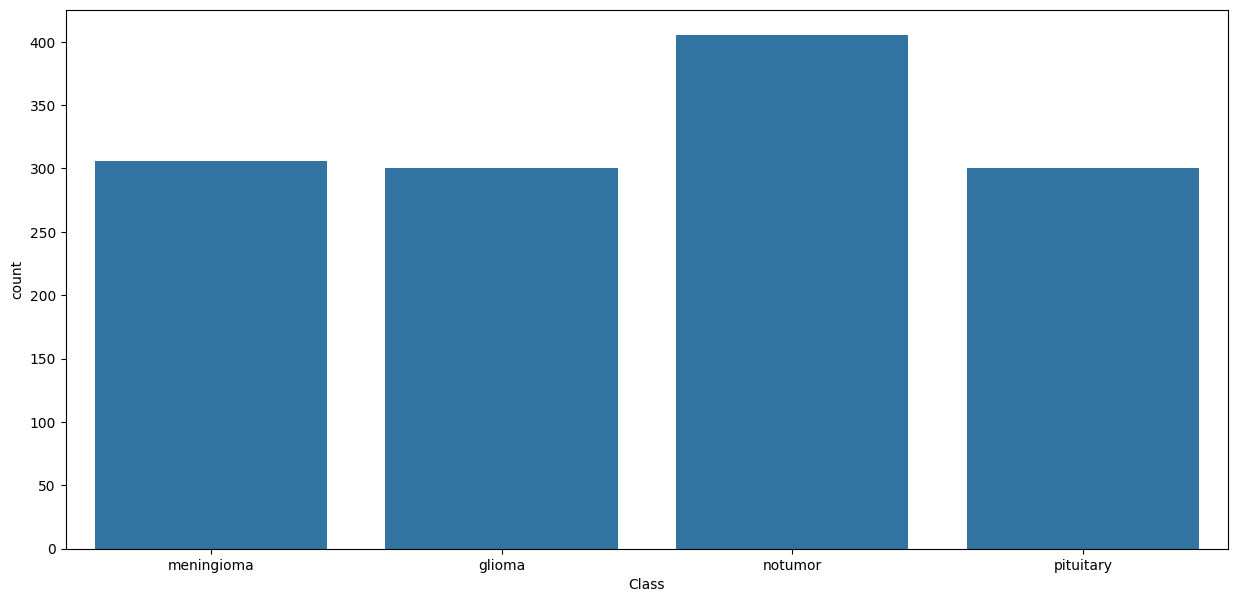

In [11]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix # For evaluating performance
import tensorflow as tf
from tensorflow.keras.models import Sequential # Allows us to build a neural network layer by layer
from tensorflow.keras.layers import Dense, Dropout, Flatten # Optimizers
from tensorflow.keras.optimizers import Adamax # Optimizers
from tensorflow.keras.metrics import Precision, Recall # Optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Optimizers

In [13]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])


In [14]:
valid_df

,Class Path,Class
41,/content/brain-tumor-mri-dataset/Testing/menin...,meningioma
970,/content/brain-tumor-mri-dataset/Testing/notum...,notumor
420,/content/brain-tumor-mri-dataset/Testing/gliom...,glioma
628,/content/brain-tumor-mri-dataset/Testing/notum...,notumor
1114,/content/brain-tumor-mri-dataset/Testing/pitui...,pituitary
...,...,...
1028,/content/brain-tumor-mri-dataset/Testing/pitui...,pituitary
861,/content/brain-tumor-mri-dataset/Testing/notum...,notumor
192,/content/brain-tumor-mri-dataset/Testing/menin...,meningioma
1016,/content/brain-tumor-mri-dataset/Testing/pitui...,pituitary


In [15]:
ts_df

,Class Path,Class
161,/content/brain-tumor-mri-dataset/Testing/menin...,meningioma
217,/content/brain-tumor-mri-dataset/Testing/menin...,meningioma
301,/content/brain-tumor-mri-dataset/Testing/menin...,meningioma
683,/content/brain-tumor-mri-dataset/Testing/notum...,notumor
1265,/content/brain-tumor-mri-dataset/Testing/pitui...,pituitary
...,...,...
512,/content/brain-tumor-mri-dataset/Testing/gliom...,glioma
703,/content/brain-tumor-mri-dataset/Testing/notum...,notumor
571,/content/brain-tumor-mri-dataset/Testing/gliom...,glioma
1053,/content/brain-tumor-mri-dataset/Testing/pitui...,pituitary


In [16]:
# Preprocessing Steps

batch_size = 32 # No. of images the model will process at once

img_size = (299, 299) # The images are of different sizes and shapes so we want to keep them at the same dimension

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))
# Rescale pixel values from [0, 255] -> [0, 1]
# Randomly assigns brightness between 80-120% to make model more robust

ts_gen = ImageDataGenerator(rescale=1/255)
# Rescaling of pixels but does not change brightness
# So format is adjusted but content is not - probably for testing dataset


In [17]:
# Generators

tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                             y_col = 'Class',
                                             batch_size = batch_size,
                                             target_size = img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                             y_col = 'Class',
                                             batch_size = batch_size,
                                             target_size = img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col = 'Class',
                                             batch_size = 16,
                                             target_size = img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


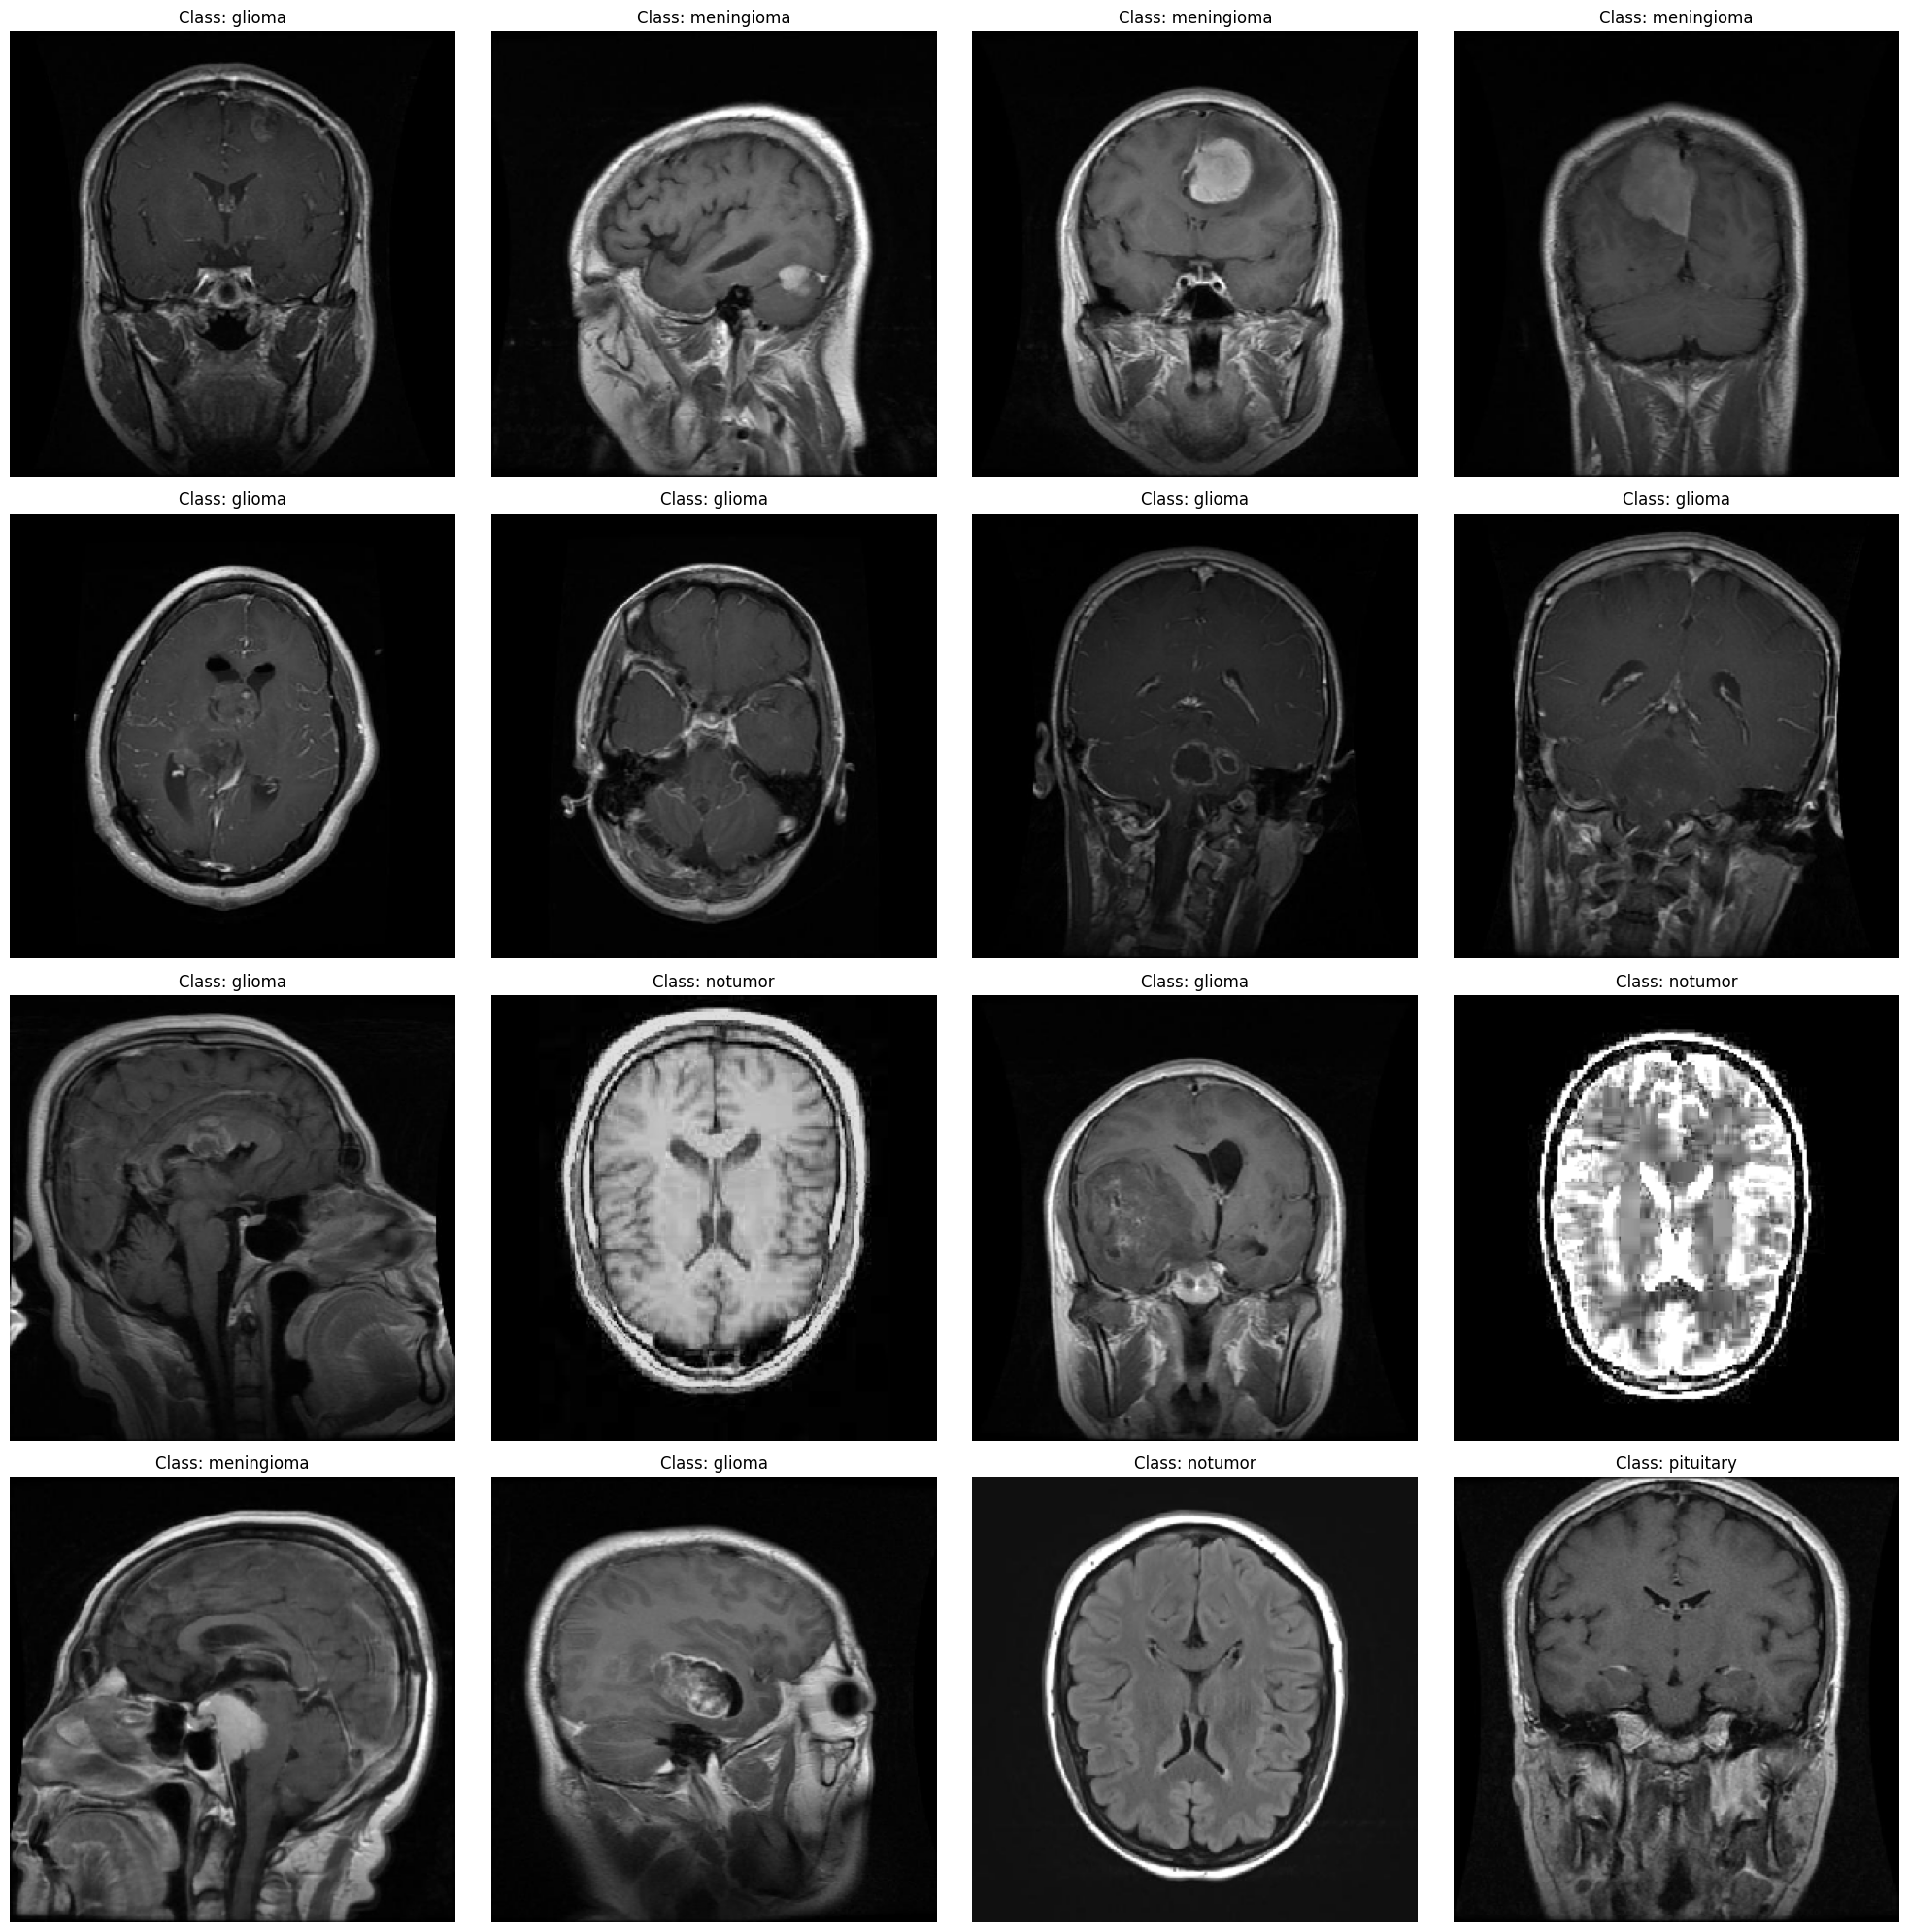

In [18]:
plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4, 4, i+1)
    batch = next(tr_gen)
    image = batch[0][0] # Extracted first image from Numpy array of images
    label = batch[1][0] # Extracted first label from Numpy array of respective labels
    plt.imshow(image)

    # Get the class index
    class_index = np.argmax(label) # Example: If label = [0, 0, 1, 0], np.argmax(label) returns 2

    # Get the list of class names and class indices
    class_names = list(tr_gen.class_indices.keys())
    class_indices = list(tr_gen.class_indices.values())

    # Find the index of the class_index in the list of indices
    index_position = class_indices.index(class_index)

    # Get the class name using the index position
    class_name = class_names[index_position]

    plt.title(f"Class: {class_name}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [19]:
img_shape = (299, 299, 3) # 3 color channels

# Load in the exception model pretrained on the Imagenet dataset but applying some extra details

base_model = tf.keras.applications.Xception(include_top=False,
                                            weights='imagenet',
                                            input_shape= img_shape,
                                            pooling='max')

model = Sequential([
    base_model,  # The Exception Model
    Flatten(), # Converting the ectracted details from the base model into a tensor to pass onto each neuron
    Dropout(rate=0.3),
    Dense(128, activation='relu'), # 128 Neurons - relu for non-linear relationships between input and output
    Dropout(rate=0.25),
    Dense(4, activation='softmax') # 4 different kind of predictions - softmax is an activation function used in the last layer and gives probabilities
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [20]:
# Final step is compilation

# Using Adamax optimizer - helps by telling how many steps to take.
# Example, you are blindfolded at the base of a mountain.
# If you are far away it will tell you to take bigger steps else smaller. It also helps with direction.

# Adamax also tried to minimize the loss function.
# If loss function is zero then predicted is the same as supposed.
# if loss function is high then there is big difference and so the optimizer wants to close the gap.

# Learning rate of 0.001 is a good starting point
# Low Learning rate means model takes small steps so takes longer but more accurate.
# High learning rate means model takes big steps so is quicker but less accurate.
# => Key is to find a learning rate that allows the model to learn quickly (low cost) and accurately.

# categorical_crossentropy - how much do predicted probabilities differ from actual probabilities - penalizes the model heavily for incorrect predictions.
# Accuracy: Percentage of correct predictions.
# Precision: Percentage of true positives.
# Recall: Percentage of true positives that were correctly identified.

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
              Precision(),
              Recall()])

# The following diagrams show how the probabilities are reconfigured based on the loss calculation.
# The bottom image is the first part and the upper image is the second part after readjustment and improvement.


In [21]:
hist = model.fit(tr_gen, epochs = 5, validation_data = valid_gen)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - accuracy: 0.7236 - loss: 0.8213 - precision: 0.8385 - recall: 0.5873 - val_accuracy: 0.9466 - val_loss: 0.1822 - val_precision: 0.9522 - val_recall: 0.9435
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 159s 885ms/step - accuracy: 0.9724 - loss: 0.0826 - precision: 0.9776 - recall: 0.9678 - val_accuracy: 0.9557 - val_loss: 0.1441 - val_precision: 0.9585 - val_recall: 0.9527
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 158s 881ms/step - accuracy: 0.9900 - loss: 0.0330 - precision: 0.9908 - recall: 0.9889 - val_accuracy: 0.9237 - val_loss: 0.2520 - val_precision: 0.9320 - val_recall: 0.9206
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 163s 911ms/step - accuracy: 0.9892 - loss: 0.0374 - precision: 0.9896 - recall: 0.9886 - val_accuracy: 0.9863 - val_loss: 0.0416 - val_precision: 0.9863 - val_recall: 0.9863
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 158s 882ms/step - accuracy: 0.9954 - loss: 0.0118 - precision: 0.9954 - recall: 0.9949 - val_accuracy: 0.9878 - 

In [22]:
print(hist.history.keys())

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])


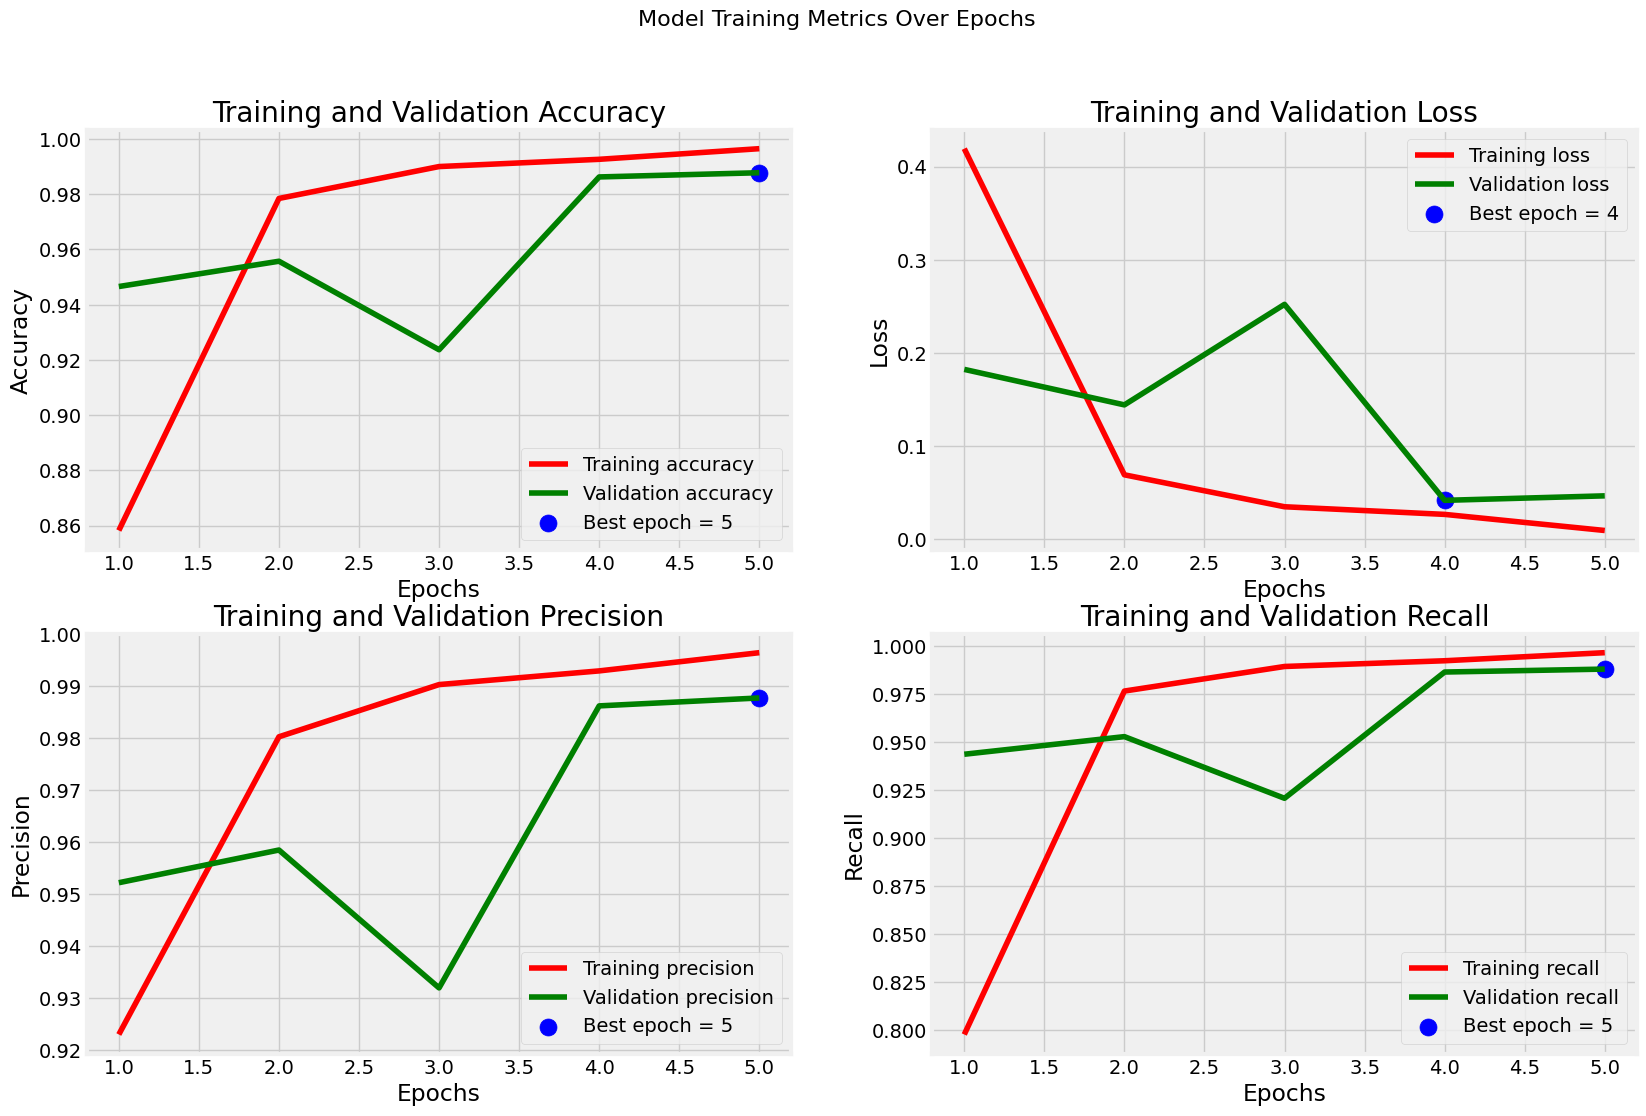

In [23]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [24]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")

print(f"\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")

print(f"\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 47s 260ms/step - accuracy: 0.9996 - loss: 0.0024 - precision: 0.9996 - recall: 0.9996
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step - accuracy: 0.9943 - loss: 0.0197 - precision: 0.9943 - recall: 0.9943


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.9935 - loss: 0.0783 - precision: 0.9935 - recall: 0.9935
Train Accuracy: 99.93%
Train Loss: 0.0039

Validation Accuracy: 99.24%
Validation Loss: 0.0342

Test Accuracy: 99.09%
Test Loss: 0.1019


41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step


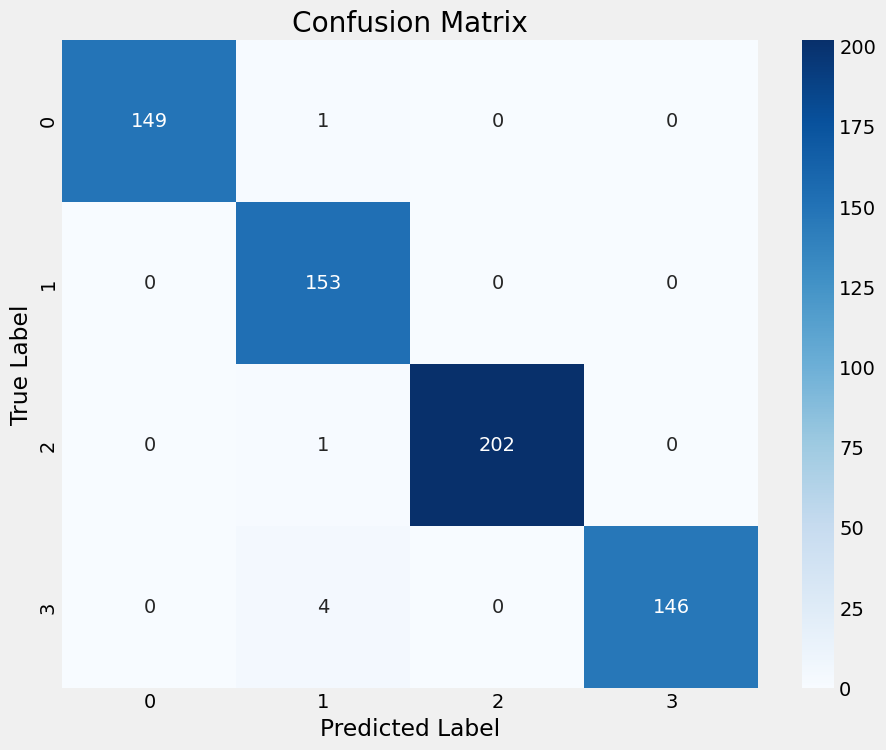

In [25]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [26]:
from PIL import Image

def predict(img_path: str) -> None:
    # Get class labels
    labels = list(class_dict.keys())

    # Create figure
    plt.figure(figsize=(6, 8))

    # Load and preprocess image
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img_array = np.asarray(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Get model predictions
    predictions = model.predict(img_array)
    probabilities = list(predictions[0])

    # Get predicted class
    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    # Plot original image
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

    # Plot prediction probabilities
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel("Probability", fontsize=15)
    plt.title("Class Probabilities")

    # Add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars, fmt="%.2f")

    plt.tight_layout()
    plt.show()

    print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


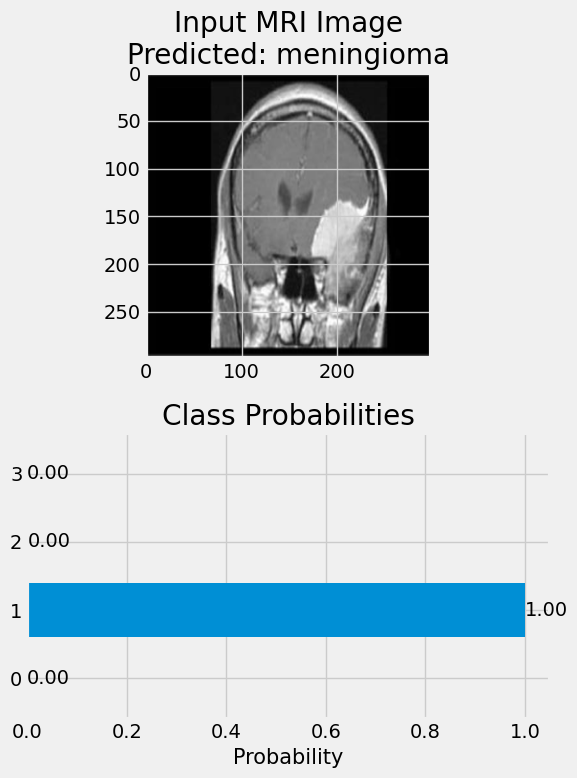


Predicted tumor type: meningioma


In [27]:
predict("/content/brain-tumor-mri-dataset/Testing/meningioma/Te-meTr_0000.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


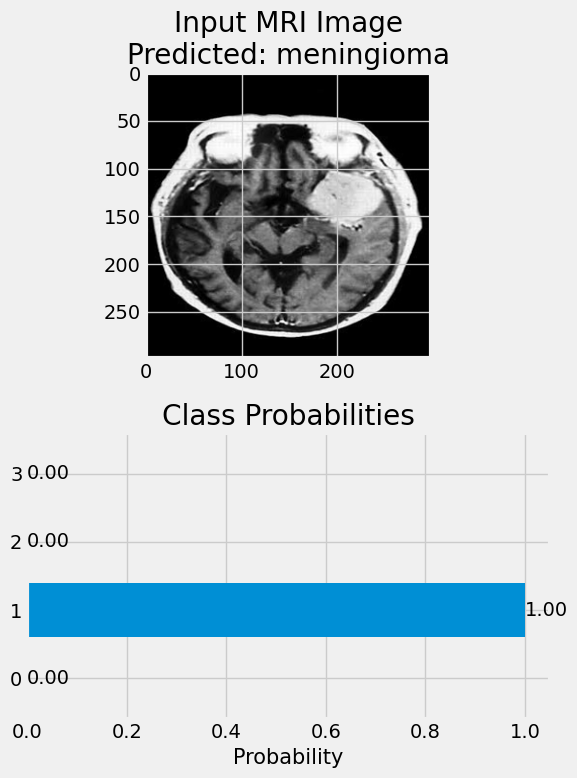


Predicted tumor type: meningioma


In [28]:
predict("/content/brain-tumor-mri-dataset/Testing/meningioma/Te-meTr_0005.jpg")


In [29]:
model.save_weights("xception_model.weights.h5")

In [30]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 116.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.5 MB/s eta 0:00:00


In [31]:
from threading import Thread # Allows streamlit to run with colab simultaneously
from pyngrok import ngrok # Allows us to create secure tunnels to localhost, can securely make it public via encryption
from google.colab import userdata
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
def run_streamlit():
    os.system("streamlit run /content/app.py --server.port 8501")

In [33]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai # gemini model to generate explanations of the brain scans
from google.colab import userdata
import PIL.Image
import os
from dotenv import load_dotenv
load_dotenv()

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

# saliency maps is the directory where we store the saliency images

output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)


def generate_explanation(img_path, model_prediction, confidence):
    prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
    The saliency map was generated by a deep learning model that was trained to classify brain tumors
    as either glioma, meningioma, pituitary, or no tumor.

    The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

    The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

    In your response:
    - Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted in light cyan, those are the regions where the model is focusing on.
    - Explain possible reasons why the model made the prediction it did.
    - Don't mention anything like 'The saliency map highlights the regions the model is focusing on, which are in light cyan' in your explanation.
    - Keep your explanation to 4 sentences max.
    """

    img = PIL.Image.open(img_path)

    model = genai.GenerativeModel(model_name="gemini-1.5-flash")
    response = model.generate_content([prompt, img])

    return response.text



# saliency shows which pixels in the image were the most important to deduce the conclusion

def generate_saliency_map(model, img_array, class_index, img_size):
    with tf.GradientTape() as tape:
        img_tensor = tf.convert_to_tensor(img_array)
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        target_class = predictions[0, class_index]

    gradients = tape.gradient(target_class, img_tensor)
    gradients = tf.math.abs(gradients)
    gradients = tf.reduce_max(gradients, axis=-1)
    gradients = gradients.numpy().squeeze()

    # Resize gradients to match original image size
    gradients = cv2.resize(gradients, img_size)

    # Create a circular mask for the brain area
    center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
    radius = min(center[0], center[1]) - 10
    x, y = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
    mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

    # Apply mask to gradients
    gradients = gradients * mask

    # Normalize only the brain area
    brain_gradients = gradients[mask]
    if brain_gradients.max() > brain_gradients.min():
        brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
        gradients[mask] = brain_gradients

    # Apply a higher threshold
    threshold = np.percentile(gradients[mask], 80)
    gradients[gradients < threshold] = 0

    # Apply more aggressive smoothing
    gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

    # Create a heatmap overlay with enhanced contrast
    heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Resize heatmap to match original image size
    heatmap = cv2.resize(heatmap, img_size)

    # Superimpose the heatmap on the original image with increased opacity
    original_img = image.img_to_array(img)
    superimposed_img = heatmap * 0.7 + original_img * 0.3
    superimposed_img = superimposed_img.astype(np.uint8)

    img_path = os.path.join(output_dir, uploaded_file.name)
    with open(img_path, "wb") as f:
        f.write(uploaded_file.getbuffer())

    saliency_map_path = f'saliency_maps/{uploaded_file.name}'

    # Save the saliency map
    cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

    return superimposed_img


# use the load_xcception_model part of its package
# for cnn we use the load_model from streamlit or tensorflow

def load_xception_model(model_path):
    img_shape = (299, 299, 3)
    base_model = tf.keras.applications.Xception(
        include_top=False,
        weights="imagenet",
        input_shape=img_shape,
        pooling="max"
    )

    model = Sequential([
        base_model,
        Flatten(),
        Dropout(rate=0.3),
        Dense(128, activation='relu'),
        Dropout(rate=0.25),
        Dense(4, activation='softmax')
    ])

    model.build((None,) + img_shape)

    # Compile the model
    model.compile(
        Adamax(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy', Precision(), Recall()]
    )

    model.load_weights(model_path)
    return model


st.title("Brain Tumor Classification")
st.write("Upload an image of a brain MRI scan to classify.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

# the user has uploaded an image for scanning we want to give them the choice to choose between
# the transfer learning model using xception
# the custom onvolutional neural network model

if uploaded_file is not None:
    selected_model = st.radio(
        "Select Model",
        ("Transfer Learning - Xception" ,"Custom CNN")
    )

    if selected_model == "Transfer Learning - Xception":
        model = load_xception_model('/content/drive/MyDrive/Headstarter/Brain_Tumor_Classification/xception_model.weights.h5')
        img_size = (299,299)
    else:
        model = load_model('/content/drive/MyDrive/Headstarter/Brain_Tumor_Classification/cnn_model.h5')
        img_size = (224,224)

    labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
    img = image.load_img(uploaded_file, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)

    # Get the class with the highest probability
    class_index = np.argmax(prediction[0])
    result = labels[class_index]

    st.write(f"Predicted Class: {result}")
    st.write("Predictions:")
    for label, prob in zip(labels, prediction[0]):
        st.write(f"{label}: {prob:.4f}")

    saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

    col1, col2 = st.columns(2)
    with col1:
        st.image(uploaded_file, caption='Uploaded Image', use_container_width=True)
    with col2:
        st.image(saliency_map, caption='Saliency Map', use_container_width=True)

    saliency_map_path = f'saliency_maps/{uploaded_file.name}'
    explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])

    st.write("## Explanation")
    st.write(explanation)

Writing app.py


In [34]:
thread = Thread(target=run_streamlit)
thread.start()

In [39]:
from pyngrok import ngrok

# Authenticate with your token
ngrok.set_auth_token("2v4vLUliWk1xXbMUUbqOvixlDRq_XPjXgFoQiFn1pArEeUPL")

# Now start your tunnel
public_url = ngrok.connect(8501)
print("Public URL:", public_url)


Public URL: NgrokTunnel: "https://d963-34-125-60-223.ngrok-free.app" -> "http://localhost:8501"


In [40]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
    print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
    ngrok.disconnect(tunnel.public_url)

Closing tunnel: https://d963-34-125-60-223.ngrok-free.app -> http://localhost:8501


In [41]:
%%writefile .env
GOOGLE_API_KEY=

Writing .env
